In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from statsmodels.stats.anova import anova_lm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import math
import datetime

In [2]:
data_source = './original_data/data1.csv'
df = pd.read_csv(data_source)

In [3]:
df.head()

,index,timestamp,open,close,high,low,volume,buy_volume,sell_volume,max_buy,...,buy_50,buy_100,buy_500,buy_1000,buy_10000,buy_100000,buy_200000,buy_count,sell_count,avg_volume
0,0,2019-06-01 00:00:00,8546.0,8544.0,8546.5,8543.5,2863215,1490030,1373185,200000.0,...,160,142,113,95,19,4.0,NaN,201,504,4061.297872
1,1,2019-06-01 00:01:00,8544.5,8557.0,8563.0,8544.0,2058785,1479285,579500,189127.0,...,464,388,252,181,33,1.0,NaN,712,263,2111.574359
2,2,2019-06-01 00:02:00,8556.5,8565.5,8567.5,8556.5,2468185,1224395,1243790,74000.0,...,382,347,232,186,22,0.0,NaN,571,120,3571.903039
3,3,2019-06-01 00:03:00,8566.0,8562.5,8566.0,8557.5,931585,263639,667946,18521.0,...,108,87,65,49,3,0.0,NaN,172,259,2161.450116
4,4,2019-06-01 00:04:00,8563.0,8556.5,8563.0,8556.5,797504,170871,626633,65835.0,...,32,28,23,15,3,0.0,NaN,48,237,2798.259649


In [4]:
df.columns

Index(['index', 'timestamp', 'open', 'close', 'high', 'low', 'volume',
       'buy_volume', 'sell_volume', 'max_buy', 'max_sell', 'sell_50',
       'sell_100', 'sell_500', 'sell_1000', 'sell_10000', 'sell_100000',
       'sell_200000', 'buy_50', 'buy_100', 'buy_500', 'buy_1000', 'buy_10000',
       'buy_100000', 'buy_200000', 'buy_count', 'sell_count', 'avg_volume'],
      dtype='object')

In [5]:
df.timestamp = pd.to_datetime(df.timestamp)

In [6]:
df.set_index('timestamp',inplace=True)

In [7]:
df.sort_index(inplace=True)

In [8]:
df.head()

,index,open,close,high,low,volume,buy_volume,sell_volume,max_buy,max_sell,...,buy_50,buy_100,buy_500,buy_1000,buy_10000,buy_100000,buy_200000,buy_count,sell_count,avg_volume
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-06-01 00:00:00,0,8546.0,8544.0,8546.5,8543.5,2863215,1490030,1373185,200000.0,100400.0,...,160,142,113,95,19,4.0,NaN,201,504,4061.297872
2019-06-01 00:01:00,1,8544.5,8557.0,8563.0,8544.0,2058785,1479285,579500,189127.0,90000.0,...,464,388,252,181,33,1.0,NaN,712,263,2111.574359
2019-06-01 00:02:00,2,8556.5,8565.5,8567.5,8556.5,2468185,1224395,1243790,74000.0,214169.0,...,382,347,232,186,22,0.0,NaN,571,120,3571.903039
2019-06-01 00:03:00,3,8566.0,8562.5,8566.0,8557.5,931585,263639,667946,18521.0,111334.0,...,108,87,65,49,3,0.0,NaN,172,259,2161.450116
2019-06-01 00:04:00,4,8563.0,8556.5,8563.0,8556.5,797504,170871,626633,65835.0,121070.0,...,32,28,23,15,3,0.0,NaN,48,237,2798.259649


In [9]:
for column in df.columns:
    if df[column].isna().any():
        print('{} oh shit'.format(column))

open oh shit
close oh shit
high oh shit
low oh shit
max_buy oh shit
max_sell oh shit
sell_10000 oh shit
sell_100000 oh shit
sell_200000 oh shit
buy_100000 oh shit
buy_200000 oh shit
avg_volume oh shit


In [10]:
del df['index']

In [11]:
df['target'] = np.nan
df['target'] = df['target'].astype(np.float64)

In [12]:
df.head()

,open,close,high,low,volume,buy_volume,sell_volume,max_buy,max_sell,sell_50,...,buy_100,buy_500,buy_1000,buy_10000,buy_100000,buy_200000,buy_count,sell_count,avg_volume,target
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-06-01 00:00:00,8546.0,8544.0,8546.5,8543.5,2863215,1490030,1373185,200000.0,100400.0,398,...,142,113,95,19,4.0,NaN,201,504,4061.297872,NaN
2019-06-01 00:01:00,8544.5,8557.0,8563.0,8544.0,2058785,1479285,579500,189127.0,90000.0,198,...,388,252,181,33,1.0,NaN,712,263,2111.574359,NaN
2019-06-01 00:02:00,8556.5,8565.5,8567.5,8556.5,2468185,1224395,1243790,74000.0,214169.0,91,...,347,232,186,22,0.0,NaN,571,120,3571.903039,NaN
2019-06-01 00:03:00,8566.0,8562.5,8566.0,8557.5,931585,263639,667946,18521.0,111334.0,186,...,87,65,49,3,0.0,NaN,172,259,2161.450116,NaN
2019-06-01 00:04:00,8563.0,8556.5,8563.0,8556.5,797504,170871,626633,65835.0,121070.0,157,...,28,23,15,3,0.0,NaN,48,237,2798.259649,NaN


In [13]:
for i, row in df.iterrows():
    try:
        df.at[i, 'target'] = df.loc[i+datetime.timedelta(minutes=1), 'close']
    except KeyError as e:
        pass

In [14]:
df.head()

,open,close,high,low,volume,buy_volume,sell_volume,max_buy,max_sell,sell_50,...,buy_100,buy_500,buy_1000,buy_10000,buy_100000,buy_200000,buy_count,sell_count,avg_volume,target
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-06-01 00:00:00,8546.0,8544.0,8546.5,8543.5,2863215,1490030,1373185,200000.0,100400.0,398,...,142,113,95,19,4.0,NaN,201,504,4061.297872,8557.0
2019-06-01 00:01:00,8544.5,8557.0,8563.0,8544.0,2058785,1479285,579500,189127.0,90000.0,198,...,388,252,181,33,1.0,NaN,712,263,2111.574359,8565.5
2019-06-01 00:02:00,8556.5,8565.5,8567.5,8556.5,2468185,1224395,1243790,74000.0,214169.0,91,...,347,232,186,22,0.0,NaN,571,120,3571.903039,8562.5
2019-06-01 00:03:00,8566.0,8562.5,8566.0,8557.5,931585,263639,667946,18521.0,111334.0,186,...,87,65,49,3,0.0,NaN,172,259,2161.450116,8556.5
2019-06-01 00:04:00,8563.0,8556.5,8563.0,8556.5,797504,170871,626633,65835.0,121070.0,157,...,28,23,15,3,0.0,NaN,48,237,2798.259649,8553.0


In [15]:
df.drop(df.index[-1],axis=0, inplace=True)

In [16]:
y = df.target
del df['target']
x = df.copy()

In [17]:
y = pd.DataFrame(y)

In [18]:
for column in x.columns:
    if x[column].isna().any():
        print('{} oh shit'.format(column))

open oh shit
close oh shit
high oh shit
low oh shit
max_buy oh shit
max_sell oh shit
sell_10000 oh shit
sell_100000 oh shit
sell_200000 oh shit
buy_100000 oh shit
buy_200000 oh shit
avg_volume oh shit


In [19]:
x.drop(datetime.datetime.strptime('2019-06-28 12:00:00', '%Y-%m-%d %H:%M:%S'), axis=0, inplace=True)

In [20]:
y.drop(datetime.datetime.strptime('2019-06-28 12:00:00', '%Y-%m-%d %H:%M:%S'), axis=0, inplace=True)

In [21]:
for column in x.columns:
    if x[column].isna().any():
        print('{} oh shit'.format(column))

max_buy oh shit
max_sell oh shit
sell_10000 oh shit
sell_100000 oh shit
sell_200000 oh shit
buy_100000 oh shit
buy_200000 oh shit


In [22]:
x.fillna(value=0, inplace=True)

In [23]:
y.fillna(method='bfill', inplace=True)

In [24]:
x.isna().any()

open           False
close          False
high           False
low            False
volume         False
buy_volume     False
sell_volume    False
max_buy        False
max_sell       False
sell_50        False
sell_100       False
sell_500       False
sell_1000      False
sell_10000     False
sell_100000    False
sell_200000    False
buy_50         False
buy_100        False
buy_500        False
buy_1000       False
buy_10000      False
buy_100000     False
buy_200000     False
buy_count      False
sell_count     False
avg_volume     False
dtype: bool

In [25]:
x.describe()

,open,close,high,low,volume,buy_volume,sell_volume,max_buy,max_sell,sell_50,...,buy_50,buy_100,buy_500,buy_1000,buy_10000,buy_100000,buy_200000,buy_count,sell_count,avg_volume
count,43198.000000,43198.000000,43198.000000,43198.000000,4.319800e+04,4.319800e+04,4.319800e+04,4.319800e+04,4.319800e+04,43198.000000,...,43198.000000,43198.000000,43198.000000,43198.000000,43198.000000,43198.000000,43198.000000,43198.000000,43198.000000,43198.000000
mean,9362.878536,9362.881464,9368.970693,9356.360225,3.149687e+06,1.571768e+06,1.577919e+06,1.506361e+05,1.460412e+05,260.405829,...,253.439071,214.650215,157.843233,124.097967,30.431131,1.670517,0.414510,350.907195,349.002801,3816.947216
std,1529.863423,1529.831834,1534.245653,1525.072690,4.746145e+06,2.557309e+06,3.019206e+06,2.284279e+05,2.181193e+05,381.830314,...,325.425658,278.796878,206.390958,163.317627,44.772644,3.732469,1.369115,428.230570,474.202608,1690.001640
min,7444.000000,7444.000000,7500.000000,7435.000000,6.157000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,181.088235
25%,7980.000000,7980.000000,7982.125000,7977.000000,7.245728e+05,2.230115e+05,2.077735e+05,4.000000e+04,4.000000e+04,43.000000,...,48.000000,42.000000,31.000000,24.000000,4.000000,0.000000,0.000000,65.000000,59.000000,2650.658438
50%,8857.500000,8857.500000,8861.500000,8854.250000,1.626538e+06,7.490210e+05,7.076020e+05,1.000000e+05,9.586550e+04,147.000000,...,151.000000,128.000000,92.000000,72.000000,15.000000,0.000000,0.000000,218.000000,212.000000,3581.696612
75%,10755.000000,10755.000000,10763.500000,10746.000000,3.653984e+06,1.864259e+06,1.766369e+06,1.877328e+05,1.800835e+05,323.000000,...,331.000000,279.000000,204.000000,160.000000,38.000000,2.000000,0.000000,470.000000,449.000000,4675.095777
max,13907.000000,13907.000000,13920.000000,13881.000000,9.761558e+07,7.852113e+07,7.781222e+07,9.499913e+06,8.000000e+06,8041.000000,...,8434.000000,7551.000000,5653.000000,4406.000000,1251.000000,107.000000,44.000000,9668.000000,9560.000000,32614.656553


In [52]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2)

In [27]:
from sklearn.linear_model import RidgeCV, LassoCV

In [28]:
clf = LassoCV(cv=5)
clf.fit(xTrain, yTrain)

print('Lasso Regression Error: {}'.format(1 - clf.score(xTest, yTest)))

/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:1108: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Lasso Regression Error: 0.8925774858508988


In [29]:
clf = RandomForestRegressor(max_depth=2, max_features=math.floor(math.sqrt(len(x.columns))), n_estimators=50)

In [30]:
clf.fit(xTrain, yTrain)

/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=50, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [31]:
print('RandomForest Error: {}'.format(1 - clf.score(xTest, yTest)))

RandomForest Error: 0.10918244188569359


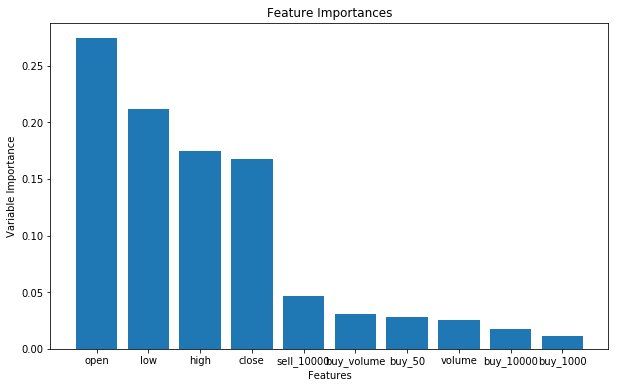

In [32]:
features = x.columns
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(range(xTrain.shape[1])[:10], importances[indices[:10]])
plt.title('Feature Importances')
plt.xticks(range(xTrain.shape[1])[:10], [features[i] for i in indices])
ax.set_xlabel('Features')
ax.set_ylabel('Variable Importance')
plt.show()

In [26]:
import xgboost as xgb

In [27]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV

In [35]:
model = xgb.XGBRegressor()

test_params = {
 'max_depth':[2,4,6]
}

model = GridSearchCV(estimator = model,param_grid = test_params, cv=5)
model.fit(xTrain, yTrain)
print(model.best_params_)
model.score(xTest, yTest)

{'max_depth': 4}


0.9998514346996861

In [36]:
model = xgb.XGBRegressor(max_depth=4)
model.fit(xTrain, yTrain)
model.score(xTest, yTest)

0.9998514346996861

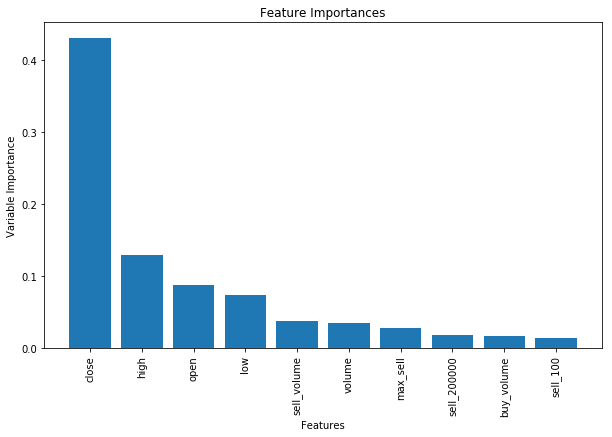

In [37]:
features = x.columns
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(range(xTrain.shape[1])[:10], importances[indices[:10]])
plt.title('Feature Importances')
plt.xticks(range(xTrain.shape[1])[:10], [features[i] for i in indices], rotation='vertical')
ax.set_xlabel('Features')
ax.set_ylabel('Variable Importance')
plt.show()

In [38]:
x.head()

,open,close,high,low,volume,buy_volume,sell_volume,max_buy,max_sell,sell_50,...,buy_50,buy_100,buy_500,buy_1000,buy_10000,buy_100000,buy_200000,buy_count,sell_count,avg_volume
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-06-01 00:00:00,8546.0,8544.0,8546.5,8543.5,2863215,1490030,1373185,200000.0,100400.0,398,...,160,142,113,95,19,4.0,0.0,201,504,4061.297872
2019-06-01 00:01:00,8544.5,8557.0,8563.0,8544.0,2058785,1479285,579500,189127.0,90000.0,198,...,464,388,252,181,33,1.0,0.0,712,263,2111.574359
2019-06-01 00:02:00,8556.5,8565.5,8567.5,8556.5,2468185,1224395,1243790,74000.0,214169.0,91,...,382,347,232,186,22,0.0,0.0,571,120,3571.903039
2019-06-01 00:03:00,8566.0,8562.5,8566.0,8557.5,931585,263639,667946,18521.0,111334.0,186,...,108,87,65,49,3,0.0,0.0,172,259,2161.450116
2019-06-01 00:04:00,8563.0,8556.5,8563.0,8556.5,797504,170871,626633,65835.0,121070.0,157,...,32,28,23,15,3,0.0,0.0,48,237,2798.259649


In [39]:
x.columns

Index(['open', 'close', 'high', 'low', 'volume', 'buy_volume', 'sell_volume',
       'max_buy', 'max_sell', 'sell_50', 'sell_100', 'sell_500', 'sell_1000',
       'sell_10000', 'sell_100000', 'sell_200000', 'buy_50', 'buy_100',
       'buy_500', 'buy_1000', 'buy_10000', 'buy_100000', 'buy_200000',
       'buy_count', 'sell_count', 'avg_volume'],
      dtype='object')

In [52]:
# x['sell_0-50'] = np.nan
# x['sell_50-100'] = np.nan
# x['sell_100-500'] = np.nan
# x['sell_500-1000'] = np.nan
# x['sell_1000-10000'] = np.nan
# x['sell_10000-100000'] = np.nan
# x['sell_100000-200000'] = np.nan

# x['buy_0-50'] = np.nan
# x['buy_50-100'] = np.nan
# x['buy_100-500'] = np.nan
# x['buy_500-1000'] = np.nan
# x['buy_1000-10000'] = np.nan
# x['buy_10000-100000'] = np.nan
# x['buy_100000-200000'] = np.nan

# x['trade_count'] = np.nan
# x['target'] = y.target

In [53]:
# x.buy_volume = x.buy_volume.astype(np.float64)
# x.sell_volume = x.sell_volume.astype(np.float64)
# x.buy_count = x.buy_count.astype(np.float64)
# x.sell_count = x.sell_count.astype(np.float64)

In [42]:
# for i, row in x.iterrows():
#     x.at[i, 'target'] = (x.loc[i, 'target']) / x.loc[i, 'close'] if x.loc[i, 'close'] != 0 else 0
#     x.at[i, 'close'] = (x.loc[i, 'close']) / x.loc[i, 'open'] if x.loc[i, 'open'] != 0 else 0
#     x.at[i, 'high'] = (x.loc[i, 'high']) / x.loc[i, 'open'] if x.loc[i, 'open'] != 0 else 0
#     x.at[i, 'low'] = (x.loc[i, 'low']) / x.loc[i, 'open'] if x.loc[i, 'open'] != 0 else 0
#     x.at[i, 'avg_volume'] = x.loc[i, 'avg_volume'] / x.loc[i, 'volume'] if x.loc[i, 'volume'] != 0 else 0
#     x.at[i, 'open'] = (x.loc[i, 'open']) / x.loc[i, 'open'] if x.loc[i, 'open'] != 0 else 0
#     x.at[i, 'max_buy'] = x.loc[i, 'max_buy'] / x.loc[i, 'buy_volume'] if x.loc[i, 'buy_volume'] != 0 else 0
#     x.at[i, 'max_sell'] = x.loc[i, 'max_sell'] / x.loc[i, 'sell_volume'] if x.loc[i, 'sell_volume'] != 0 else 0
#     x.at[i, 'buy_volume'] = (x.loc[i, 'buy_volume'] / x.loc[i, 'volume']) if x.loc[i, 'volume'] != 0 else 0
#     x.at[i, 'sell_volume'] = (x.loc[i, 'sell_volume'] / x.loc[i, 'volume']) if x.loc[i, 'volume'] != 0 else 0
    
#     total_count = (x.loc[i, 'buy_count'] + x.loc[i, 'sell_count'])
#     x.at[i, 'sell_0-50'] = (x.loc[i, 'sell_count'] - x.loc[i, 'sell_50']) / x.loc[i, 'sell_count'] if x.loc[i, 'sell_count'] != 0 else 0
#     x.at[i, 'sell_50-100'] = (x.loc[i, 'sell_50'] - x.loc[i, 'sell_100']) / x.loc[i, 'sell_count'] if x.loc[i, 'sell_count'] != 0 else 0
#     x.at[i, 'sell_100-500'] = (x.loc[i, 'sell_100'] - x.loc[i, 'sell_500']) / x.loc[i, 'sell_count'] if x.loc[i, 'sell_count'] != 0 else 0
#     x.at[i, 'sell_500-1000'] = (x.loc[i, 'sell_500'] - x.loc[i, 'sell_1000']) / x.loc[i, 'sell_count'] if x.loc[i, 'sell_count'] != 0 else 0
#     x.at[i, 'sell_1000-10000'] = (x.loc[i, 'sell_1000'] - x.loc[i, 'sell_10000']) / x.loc[i, 'sell_count'] if x.loc[i, 'sell_count'] != 0 else 0
#     x.at[i, 'sell_10000-100000'] = (x.loc[i, 'sell_10000'] - x.loc[i, 'sell_100000']) / x.loc[i, 'sell_count'] if x.loc[i, 'sell_count'] != 0 else 0
#     x.at[i, 'sell_100000-200000'] = (x.loc[i, 'sell_100000'] - x.loc[i, 'sell_200000']) / x.loc[i, 'sell_count'] if x.loc[i, 'sell_count'] != 0 else 0
#     x.at[i, 'sell_200000'] = (x.loc[i, 'sell_200000']) / x.loc[i, 'sell_count'] if x.loc[i, 'sell_count'] != 0 else 0
#     x.at[i, 'sell_count'] = x.loc[i, 'sell_count'] / total_count if total_count != 0 else 0
    
#     x.at[i, 'buy_0-50'] = (x.loc[i, 'buy_count'] - x.loc[i, 'buy_50']) / x.loc[i, 'buy_count'] if x.loc[i, 'buy_count'] != 0 else 0
#     x.at[i, 'buy_50-100'] = (x.loc[i, 'buy_50'] - x.loc[i, 'buy_100']) / x.loc[i, 'buy_count'] if x.loc[i, 'buy_count'] != 0 else 0
#     x.at[i, 'buy_100-500'] = (x.loc[i, 'buy_100'] - x.loc[i, 'buy_500']) / x.loc[i, 'buy_count'] if x.loc[i, 'buy_count'] != 0 else 0
#     x.at[i, 'buy_500-1000'] = (x.loc[i, 'buy_500'] - x.loc[i, 'buy_1000']) / x.loc[i, 'buy_count'] if x.loc[i, 'buy_count'] != 0 else 0
#     x.at[i, 'buy_1000-10000'] = (x.loc[i, 'buy_1000'] - x.loc[i, 'buy_10000']) / x.loc[i, 'buy_count'] if x.loc[i, 'buy_count'] != 0 else 0
#     x.at[i, 'buy_10000-100000'] = (x.loc[i, 'buy_10000'] - x.loc[i, 'buy_100000']) / x.loc[i, 'buy_count'] if x.loc[i, 'buy_count'] != 0 else 0
#     x.at[i, 'buy_100000-200000'] = (x.loc[i, 'buy_100000'] - x.loc[i, 'buy_200000']) / x.loc[i, 'buy_count'] if x.loc[i, 'buy_count'] != 0 else 0
#     x.at[i, 'buy_200000'] = (x.loc[i, 'buy_200000']) / x.loc[i, 'buy_count'] if x.loc[i, 'buy_count'] != 0 else 0
#     x.at[i, 'buy_count'] = x.loc[i, 'buy_count'] / total_count if total_count != 0 else 0

In [43]:
# y = pd.DataFrame(x.target)

In [44]:
# del x['trade_count']

# del x['sell_50']
# del x['sell_100']
# del x['sell_500']
# del x['sell_1000']
# del x['sell_10000']
# del x['sell_100000']

# del x['buy_50']
# del x['buy_100']
# del x['buy_500']
# del x['buy_1000']
# del x['buy_10000']
# del x['buy_100000']

# del x['volume']
# del x['target']

In [45]:
# x.columns

In [46]:
# y.head()

In [47]:
# from sklearn.preprocessing import normalize

In [48]:
# x = normalize(x)
# y = normalize(y)

In [49]:
# xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2)

In [50]:
# model = xgb.XGBRegressor()

# test_params = {
#  'max_depth':[2,4,6]
# }

# model = GridSearchCV(estimator = model,param_grid = test_params, cv=5)
# model.fit(xTrain, yTrain)
# print(model.best_params_)
# model.score(xTest, yTest)

In [51]:
# clf = RandomForestRegressor(max_depth=2, max_features=math.floor(math.sqrt(len(x.columns))), n_estimators=50)
# clf.fit(xTrain, yTrain)
# clf.score(xTest, yTest)

In [54]:
x.head()

,open,close,high,low,volume,buy_volume,sell_volume,max_buy,max_sell,sell_50,...,sell_100000-200000,buy_0-50,buy_50-100,buy_100-500,buy_500-1000,buy_1000-10000,buy_10000-100000,buy_100000-200000,trade_count,target
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-06-01 00:00:00,8546.0,8544.0,8546.5,8543.5,2863215,1490030.0,1373185.0,200000.0,100400.0,398,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8557.0
2019-06-01 00:01:00,8544.5,8557.0,8563.0,8544.0,2058785,1479285.0,579500.0,189127.0,90000.0,198,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8565.5
2019-06-01 00:02:00,8556.5,8565.5,8567.5,8556.5,2468185,1224395.0,1243790.0,74000.0,214169.0,91,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8562.5
2019-06-01 00:03:00,8566.0,8562.5,8566.0,8557.5,931585,263639.0,667946.0,18521.0,111334.0,186,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8556.5
2019-06-01 00:04:00,8563.0,8556.5,8563.0,8556.5,797504,170871.0,626633.0,65835.0,121070.0,157,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8553.0


In [57]:
x.dropna(axis=1,inplace=True)
del x['target']

In [58]:
x.head()

,open,close,high,low,volume,buy_volume,sell_volume,max_buy,max_sell,sell_50,...,buy_50,buy_100,buy_500,buy_1000,buy_10000,buy_100000,buy_200000,buy_count,sell_count,avg_volume
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-06-01 00:00:00,8546.0,8544.0,8546.5,8543.5,2863215,1490030.0,1373185.0,200000.0,100400.0,398,...,160,142,113,95,19,4.0,0.0,201.0,504.0,4061.297872
2019-06-01 00:01:00,8544.5,8557.0,8563.0,8544.0,2058785,1479285.0,579500.0,189127.0,90000.0,198,...,464,388,252,181,33,1.0,0.0,712.0,263.0,2111.574359
2019-06-01 00:02:00,8556.5,8565.5,8567.5,8556.5,2468185,1224395.0,1243790.0,74000.0,214169.0,91,...,382,347,232,186,22,0.0,0.0,571.0,120.0,3571.903039
2019-06-01 00:03:00,8566.0,8562.5,8566.0,8557.5,931585,263639.0,667946.0,18521.0,111334.0,186,...,108,87,65,49,3,0.0,0.0,172.0,259.0,2161.450116
2019-06-01 00:04:00,8563.0,8556.5,8563.0,8556.5,797504,170871.0,626633.0,65835.0,121070.0,157,...,32,28,23,15,3,0.0,0.0,48.0,237.0,2798.259649


In [80]:
from sklearn.preprocessing import StandardScaler

In [71]:
scaler = StandardScaler()
transX = scaler.fit_transform(x)
transY = scaler.fit_transform(y)

/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [72]:
xTrain, xTest, yTrain, yTest = train_test_split(transX, transY, test_size=0.2)

In [74]:
new_model = xgb.XGBRegressor()

test_params = {
 'max_depth':[2,4,6]
}

new_model = GridSearchCV(estimator = new_model,param_grid = test_params, cv=5)
new_model.fit(xTrain, yTrain)
print(new_model.best_params_)
new_model.score(xTest, yTest)

{'max_depth': 4}


0.9998806424333657

In [77]:
data_source = './original_data/test.csv'
df = pd.read_csv(data_source)

In [78]:
df.head()

,Unnamed: 0,timestamp,open,close,high,low,volume,buy_volume,sell_volume,max_buy,...,buy_50,buy_100,buy_500,buy_1000,buy_10000,buy_100000,buy_200000,buy_count,sell_count,avg_volume
0,0,2019-08-01 00:00:00,10088.5,10108.0,10108.5,10088.5,5189557,3859798,1329759,466922.0,...,748,622,380,296,85.0,2.0,1.0,1053,297,3844.116296
1,1,2019-08-01 00:01:00,10107.5,10109.0,10120.0,10100.0,5792264,4627428,1164836,250962.0,...,890,778,471,357,99.0,6.0,1.0,1166,512,3451.885578
2,2,2019-08-01 00:02:00,10108.5,10093.0,10109.0,10088.5,4974185,1213736,3760449,100000.0,...,217,194,152,127,32.0,0.0,0.0,297,707,4954.367530
3,3,2019-08-01 00:03:00,10093.0,10111.5,10111.5,10093.0,1863787,1436924,426863,100000.0,...,346,298,188,146,36.0,0.0,0.0,559,88,2880.659969
4,4,2019-08-01 00:04:00,10111.0,10106.0,10120.5,10105.0,3785526,2517687,1267839,212011.0,...,393,334,211,164,55.0,4.0,1.0,579,450,3678.839650


In [79]:
df.columns

Index(['Unnamed: 0', 'timestamp', 'open', 'close', 'high', 'low', 'volume',
       'buy_volume', 'sell_volume', 'max_buy', 'max_sell', 'sell_50',
       'sell_100', 'sell_500', 'sell_1000', 'sell_10000', 'sell_100000',
       'sell_200000', 'buy_50', 'buy_100', 'buy_500', 'buy_1000', 'buy_10000',
       'buy_100000', 'buy_200000', 'buy_count', 'sell_count', 'avg_volume'],
      dtype='object')

In [80]:
del df['Unnamed: 0']

In [81]:
df.head()

,timestamp,open,close,high,low,volume,buy_volume,sell_volume,max_buy,max_sell,...,buy_50,buy_100,buy_500,buy_1000,buy_10000,buy_100000,buy_200000,buy_count,sell_count,avg_volume
0,2019-08-01 00:00:00,10088.5,10108.0,10108.5,10088.5,5189557,3859798,1329759,466922.0,198900.0,...,748,622,380,296,85.0,2.0,1.0,1053,297,3844.116296
1,2019-08-01 00:01:00,10107.5,10109.0,10120.0,10100.0,5792264,4627428,1164836,250962.0,116009.0,...,890,778,471,357,99.0,6.0,1.0,1166,512,3451.885578
2,2019-08-01 00:02:00,10108.5,10093.0,10109.0,10088.5,4974185,1213736,3760449,100000.0,218000.0,...,217,194,152,127,32.0,0.0,0.0,297,707,4954.367530
3,2019-08-01 00:03:00,10093.0,10111.5,10111.5,10093.0,1863787,1436924,426863,100000.0,100000.0,...,346,298,188,146,36.0,0.0,0.0,559,88,2880.659969
4,2019-08-01 00:04:00,10111.0,10106.0,10120.5,10105.0,3785526,2517687,1267839,212011.0,187830.0,...,393,334,211,164,55.0,4.0,1.0,579,450,3678.839650


In [82]:
df.timestamp = pd.to_datetime(df.timestamp)

In [83]:
df.set_index('timestamp',inplace=True)

In [84]:
df.sort_index(inplace=True)

In [85]:
df.isna().any()

open           False
close          False
high           False
low            False
volume         False
buy_volume     False
sell_volume    False
max_buy         True
max_sell        True
sell_50        False
sell_100       False
sell_500       False
sell_1000      False
sell_10000      True
sell_100000     True
sell_200000     True
buy_50         False
buy_100        False
buy_500        False
buy_1000       False
buy_10000       True
buy_100000      True
buy_200000      True
buy_count      False
sell_count     False
avg_volume     False
dtype: bool

In [86]:
df.

,open,close,high,low,volume,buy_volume,sell_volume,max_buy,max_sell,sell_50,...,buy_50,buy_100,buy_500,buy_1000,buy_10000,buy_100000,buy_200000,buy_count,sell_count,avg_volume
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-08-12 02:04:00,11480.0,11480.0,11480.0,11480.0,55530,0,55530,NaN,15000.0,20,...,0,0,0,0,0.0,0.0,0.0,0,28,1983.214286
2019-08-18 23:37:00,10339.0,10338.5,10339.0,10338.5,72825,0,72825,NaN,13039.0,28,...,0,0,0,0,0.0,0.0,0.0,0,48,1517.187500
2019-08-25 19:13:00,10058.5,10058.5,10058.5,10058.5,170354,0,170354,NaN,35000.0,37,...,0,0,0,0,0.0,0.0,0.0,0,66,2581.121212
2019-08-27 07:49:00,10144.0,10144.0,10144.0,10144.0,206160,206160,0,50000.0,NaN,0,...,32,26,19,18,6.0,0.0,0.0,56,0,3681.428571
2019-08-31 05:04:00,9603.5,9603.5,9603.5,9603.5,61797,61797,0,7743.0,NaN,0,...,49,42,18,12,0.0,0.0,0.0,75,0,823.960000


In [87]:
df.fillna(value=0, inplace=True)

In [88]:
for i, row in df.iterrows():
    try:
        df.at[i, 'target'] = df.loc[i+datetime.timedelta(minutes=1), 'close']
    except KeyError as e:
        pass

In [90]:
df.tail()

,open,close,high,low,volume,buy_volume,sell_volume,max_buy,max_sell,sell_50,...,buy_100,buy_500,buy_1000,buy_10000,buy_100000,buy_200000,buy_count,sell_count,avg_volume,target
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-08-31 23:55:00,9605.5,9603.0,9605.5,9602.5,444635,1329,443306,1000.0,137727.0,133,...,1,1,0,0.0,0.0,0.0,69,425,900.070850,9603.0
2019-08-31 23:56:00,9602.5,9603.0,9603.0,9602.5,87349,31054,56295,10000.0,25000.0,14,...,10,9,6,0.0,0.0,0.0,76,19,919.463158,9603.0
2019-08-31 23:57:00,9603.0,9603.0,9603.0,9602.5,363048,263903,99145,68902.0,36216.0,25,...,36,30,25,5.0,0.0,0.0,116,40,2327.230769,9603.0
2019-08-31 23:58:00,9602.5,9603.0,9603.0,9602.5,151053,97864,53189,35360.0,30000.0,4,...,22,19,10,2.0,0.0,0.0,70,9,1912.063291,9602.5
2019-08-31 23:59:00,9603.0,9602.5,9603.0,9602.5,320935,300921,20014,67619.0,10000.0,11,...,38,32,27,6.0,0.0,0.0,75,66,2276.134752,NaN


In [91]:
df.drop(df.index[-1],inplace=True)
y = df.target
del df['target']
x = df.copy()
y = pd.DataFrame(y)

In [94]:
y.head()

,target
timestamp,
2019-08-01 00:00:00,10109.0
2019-08-01 00:01:00,10093.0
2019-08-01 00:02:00,10111.5
2019-08-01 00:03:00,10106.0
2019-08-01 00:04:00,10112.5


In [95]:
scaler = StandardScaler()
transXTestData = scaler.fit_transform(x)
transYTestData = scaler.fit_transform(y)

/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [96]:
xTrain_t, xTest_t, yTrain_t, yTest_t = train_test_split(transXTestData, transYTestData, test_size=0.2)

In [97]:
new_model.score(xTrain_t, yTrain_t)

0.991062411028958

In [99]:
new_model = xgb.XGBRegressor(max_depth=4)
new_model.fit(xTrain, yTrain)
new_model.score(xTest, yTest)

0.9998806424333657

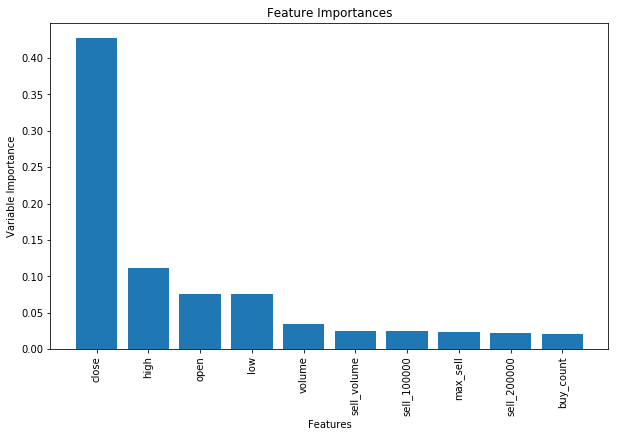

In [100]:
features = x.columns
importances = new_model.feature_importances_
indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(range(xTrain.shape[1])[:10], importances[indices[:10]])
plt.title('Feature Importances')
plt.xticks(range(xTrain.shape[1])[:10], [features[i] for i in indices], rotation='vertical')
ax.set_xlabel('Features')
ax.set_ylabel('Variable Importance')
plt.show()

# Classification

In [26]:
y.head()

,target
timestamp,
2019-06-01 00:00:00,8557.0
2019-06-01 00:01:00,8565.5
2019-06-01 00:02:00,8562.5
2019-06-01 00:03:00,8556.5
2019-06-01 00:04:00,8553.0


In [27]:
for i, row in x.iterrows():
    if y.loc[i,'target'] <= x.loc[i,'close']:
        y.at[i,'target'] = -1
    else:
        y.at[i,'target'] = 1

In [28]:
y.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43198 entries, 2019-06-01 00:00:00 to 2019-06-30 23:58:00
Data columns (total 1 columns):
target    43198 non-null float64
dtypes: float64(1)
memory usage: 1.9 MB


In [29]:
y['target'] = y['target'].astype(np.int64)

In [30]:
y.head()

,target
timestamp,
2019-06-01 00:00:00,1
2019-06-01 00:01:00,1
2019-06-01 00:02:00,-1
2019-06-01 00:03:00,-1
2019-06-01 00:04:00,-1


In [31]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2)

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [33]:
clf = RandomForestClassifier()

test_params = {
 'max_depth':[2,4,6]
}

clf = GridSearchCV(estimator = clf,param_grid = test_params, cv=5)
clf.fit(xTrain, yTrain)
print(clf.best_params_)

/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/model_selection/_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'max_depth': 6}


In [34]:
clf = RandomForestClassifier(max_depth=4)
clf.fit(xTrain, yTrain)

/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [35]:
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, balanced_accuracy_score
from sklearn.preprocessing import StandardScaler

In [36]:
y_pred = clf.predict(xTrain)

In [37]:
print(f1_score(yTrain, y_pred))
print(confusion_matrix(yTrain, y_pred))

0.41144166567895385
[[14454  3932]
 [10965  5207]]


In [38]:
scaler = StandardScaler()
transXTrain = scaler.fit_transform(xTrain)

/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [39]:
len(xTrain)

34558

In [40]:
clf = RandomForestClassifier()

test_params = {
 'max_depth':[2,4,6]
}

clf = GridSearchCV(estimator = clf,param_grid = test_params, cv=5)
clf.fit(transXTrain, yTrain)
print(clf.best_params_)

/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/model_selection/_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'max_depth': 6}


In [40]:
clf = RandomForestClassifier(max_depth=4)
clf.fit(transXTrain, yTrain)

/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [41]:
y_pred = clf.predict(transXTrain)
print(f1_score(yTrain, y_pred))
print(balanced_accuracy_score(yTrain, y_pred))
print(accuracy_score(yTrain, y_pred))
print(confusion_matrix(yTrain, y_pred))

0.37608966376089664
0.5479215680967293
0.5650789976271775
[[14998  3388]
 [11642  4530]]


In [42]:
transXTest = scaler.fit_transform(xTest)

/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [43]:
y_pred = clf.predict(transXTest)
print(balanced_accuracy_score(yTest, y_pred))
print(confusion_matrix(yTest, y_pred))

0.5430856534290006
[[3466 1090]
 [2755 1329]]


In [44]:
np.random.seed(1)
benchmark = np.random.randint(low=0,high=2,size=len(transXTest))

In [45]:
benchmark = [-1 if x == 0 else 1 for x in benchmark]

In [46]:
accuracy_score(yTest, benchmark)

0.5005787037037037

Our randomforest model performs worse at classifying whether or not the next tick will be higher/lower from where we are currently than a random guess. :(

In [47]:
import xgboost as xgb

In [49]:
new_model = xgb.XGBClassifier()

test_params = {
 'max_depth':[2,4,6]
}

new_model = GridSearchCV(estimator = new_model,param_grid = test_params, cv=5)
new_model.fit(transXTrain, yTrain)
print(new_model.best_params_)

/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when 

/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'max_depth': 2}


In [48]:
new_model = xgb.XGBClassifier(max_depth=2)
new_model.fit(transXTrain, yTrain)

/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [49]:
y_pred = new_model.predict(transXTest)
print(f1_score(yTest, y_pred))
print(balanced_accuracy_score(yTest, y_pred))
print(accuracy_score(yTest, y_pred))
print(confusion_matrix(yTest, y_pred))

0.5
0.5571277965189321
0.5622685185185186
[[2967 1589]
 [2193 1891]]


Bechmark Scores:

In [50]:
print(f1_score(yTest, benchmark))
print(accuracy_score(yTest, benchmark))
print(balanced_accuracy_score(yTest, benchmark))
print(confusion_matrix(yTest, benchmark))

0.4844067391564105
0.5005787037037037
0.5003584729460951
[[2298 2258]
 [2057 2027]]


I've found that we can consistenly get above 50% (~56%) predictive power from the xgboostclassifier model (about the same as with randomforest) on the negative class (predicting that the next tick will be below where we are currently). We lack in predictive power ~45% on the positive class (predicting that the next tick will be above where we currently are, and that is what brings down our total f1_score). We need to figure out how to get the positive class prediction power above 50%.

In [51]:
probabilities = pd.DataFrame(new_model.predict_proba(transXTest))
probabilities.describe()

,0,1
count,8640.000000,8640.000000
mean,0.513203,0.486797
std,0.078371,0.078371
min,0.234099,0.223091
25%,0.476561,0.451478
50%,0.512525,0.487475
75%,0.548522,0.523439
max,0.776909,0.765901


In [52]:
# 50 and 75 percentile thresholds for the probability
fifty_above = 0.484719
seventyfive_above = 0.512650
fifty_below = 0.515281
seventyfive_below = 0.564374

# probabilities.loc[probabilities[1] > seventyfive, 1].median()

In [53]:
probabilities.columns = ['prob_below', 'prob_above']

In [54]:
probabilities.head()

,prob_below,prob_above
0,0.530758,0.469242
1,0.395296,0.604704
2,0.390823,0.609177
3,0.368929,0.631071
4,0.429390,0.570610


In [55]:
results = probabilities.copy()
results['prediction'] = new_model.predict(transXTest)
results['actual'] = yTest['target'].reset_index(drop=True)
results.head()

,prob_below,prob_above,prediction,actual
0,0.530758,0.469242,-1,1
1,0.395296,0.604704,1,-1
2,0.390823,0.609177,1,1
3,0.368929,0.631071,1,-1
4,0.429390,0.570610,1,-1


In [56]:
fifty_above_results = results.loc[results.prob_above > fifty_above, ['prediction','actual']].copy()
seventyfive_above_results = results.loc[results.prob_above > seventyfive_above, ['prediction','actual']].copy()
print('-- accuracy_score only longing values with probability above median probability for pos class --')
print(accuracy_score(fifty_above_results['actual'], fifty_above_results['prediction']))
print('')
print('-- accuracy_score only longing values with probability above 75 percentile probability for pos class --')
print(accuracy_score(seventyfive_above_results['actual'], seventyfive_above_results['prediction']))

-- accuracy_score only longing values with probability above median probability for pos class --
0.5373893805309734

-- accuracy_score only longing values with probability above 75 percentile probability for pos class --
0.5539403213465952


In [57]:
confusion_matrix(fifty_above_results['actual'], fifty_above_results['prediction'])

array([[ 538, 1589],
       [ 502, 1891]])

In [58]:
print(confusion_matrix(seventyfive_above_results['actual'], seventyfive_above_results['prediction']))
print(accuracy_score(seventyfive_above_results['actual'], seventyfive_above_results['prediction']))

[[   0 1166]
 [   0 1448]]
0.5539403213465952


In [59]:
below_results = results.loc[results.prob_below > 0.5, :]
above_results = results.loc[results.prob_above > 0.5, :]

In [60]:
below_results.describe()

,prob_below,prob_above,prediction,actual
count,5160.000000,5160.000000,5160.0,5160.000000
mean,0.560557,0.439444,-1.0,-0.150000
std,0.055566,0.055566,0.0,0.988782
min,0.500050,0.223091,-1.0,-1.000000
25%,0.517317,0.407945,-1.0,-1.000000
50%,0.539223,0.460777,-1.0,-1.000000
75%,0.592055,0.482683,-1.0,1.000000
max,0.776909,0.499950,-1.0,1.000000


## < 25 Percentile Bucket Shorts

Accuracy_score makes more sense to use below than f1_score because we're only looking at one class

In [61]:
print(below_results.loc[below_results.prob_below < 0.515843,'actual'].count())
print(confusion_matrix(below_results.loc[below_results.prob_below < 0.515843,'actual'], below_results.loc[below_results.prob_below < 0.515843,'prediction']))
print(accuracy_score(below_results.loc[below_results.prob_below < 0.515843,'actual'], below_results.loc[below_results.prob_below < 0.515843,'prediction']))

1169
[[597   0]
 [572   0]]
0.5106928999144568


As you can see, the above bucket of shorts gets more wrong than it gets right ~48.1%

## 25 to 50 Percentile Bucket Shorts

In [62]:
print(below_results.loc[(below_results.prob_below >= 0.515843) & (below_results.prob_below < 0.536436),'actual'].count())
print(confusion_matrix(below_results.loc[(below_results.prob_below >= 0.515843) & (below_results.prob_below < 0.536436),'actual'], below_results.loc[(below_results.prob_below >= 0.515843) & (below_results.prob_below < 0.536436),'prediction']))
print(accuracy_score(below_results.loc[(below_results.prob_below >= 0.515843) & (below_results.prob_below < 0.536436),'actual'], below_results.loc[(below_results.prob_below >= 0.515843) & (below_results.prob_below < 0.536436),'prediction']))

1233
[[655   0]
 [578   0]]
0.5312246553122466


## 50 to 75 Percentile Bucket Shorts

In [63]:
print(below_results.loc[(below_results.prob_below >= 0.536436) & (below_results.prob_below < 0.622083),'actual'].count())
print(confusion_matrix(below_results.loc[(below_results.prob_below >= 0.536436) & (below_results.prob_below < 0.622083),'actual'], below_results.loc[(below_results.prob_below >= 0.536436) & (below_results.prob_below < 0.622083),'prediction']))
print(accuracy_score(below_results.loc[(below_results.prob_below >= 0.536436) & (below_results.prob_below < 0.622083),'actual'], below_results.loc[(below_results.prob_below >= 0.536436) & (below_results.prob_below < 0.622083),'prediction']))

1835
[[1043    0]
 [ 792    0]]
0.568392370572207


## > 75 Percentile Bucket Shorts

In [64]:
print(below_results.loc[(below_results.prob_below >= 0.622083),'actual'].count())
print(confusion_matrix(below_results.loc[(below_results.prob_below >= 0.622083),'actual'], below_results.loc[(below_results.prob_below >= 0.622083),'prediction']))
print(accuracy_score(below_results.loc[(below_results.prob_below >= 0.622083),'actual'], below_results.loc[(below_results.prob_below >= 0.622083),'prediction']))

923
[[672   0]
 [251   0]]
0.7280606717226435


In [65]:
below_results.describe()

,prob_below,prob_above,prediction,actual
count,5160.000000,5160.000000,5160.0,5160.000000
mean,0.560557,0.439444,-1.0,-0.150000
std,0.055566,0.055566,0.0,0.988782
min,0.500050,0.223091,-1.0,-1.000000
25%,0.517317,0.407945,-1.0,-1.000000
50%,0.539223,0.460777,-1.0,-1.000000
75%,0.592055,0.482683,-1.0,1.000000
max,0.776909,0.499950,-1.0,1.000000


## ALL Shorts

In [66]:
print(below_results.loc[:,'actual'].count())
print(confusion_matrix(below_results.loc[:,'actual'], below_results.loc[:,'prediction']))
print(accuracy_score(below_results.loc[:,'actual'], below_results.loc[:,'prediction']))

5160
[[2967    0]
 [2193    0]]
0.575


## > 25 Percentile Shorts

In [67]:
percentile = np.percentile(below_results.loc[:,'prob_below'],25)
print(below_results.loc[below_results.prob_below > percentile,'actual'].count())
print(confusion_matrix(below_results.loc[below_results.prob_below > percentile,'actual'], below_results.loc[below_results.prob_below > percentile,'prediction']))
print(accuracy_score(below_results.loc[below_results.prob_below > percentile,'actual'], below_results.loc[below_results.prob_below > percentile,'prediction']))

3869
[[2308    0]
 [1561    0]]
0.5965365727578186


## > 50 Percentile Shorts

In [68]:
percentile = np.percentile(below_results.loc[:,'prob_below'],50)
print(below_results.loc[below_results.prob_below > percentile,'actual'].count())
print(confusion_matrix(below_results.loc[below_results.prob_below > percentile,'actual'], below_results.loc[below_results.prob_below > percentile,'prediction']))
print(accuracy_score(below_results.loc[below_results.prob_below > percentile,'actual'], below_results.loc[below_results.prob_below > percentile,'prediction']))

2577
[[1610    0]
 [ 967    0]]
0.6247574699262709


## > 75 Percentile Shorts

In [69]:
percentile = np.percentile(below_results.loc[:,'prob_below'],75)
print(below_results.loc[below_results.prob_below > percentile,'actual'].count())
print(confusion_matrix(below_results.loc[below_results.prob_below > percentile,'actual'], below_results.loc[below_results.prob_below > percentile,'prediction']))
print(accuracy_score(below_results.loc[below_results.prob_below > percentile,'actual'], below_results.loc[below_results.prob_below > percentile,'prediction']))

1290
[[896   0]
 [394   0]]
0.6945736434108527


As expected, the predictions with higher probability have higher accuracy_scores. This means that a higher percentage of them are correctly classified. We don't want to just trade the ones with higher probabilities though because the number of trades would drastically decrease, but I wonder if a good strategy might be to lever up on the ones with higher probabilities.

## < 25 Percentile Bucket Longs

In [70]:
above_results.head()

,prob_below,prob_above,prediction,actual
1,0.395296,0.604704,1,-1
2,0.390823,0.609177,1,1
3,0.368929,0.631071,1,-1
4,0.429390,0.570610,1,-1
6,0.444252,0.555748,1,-1


In [71]:
print(above_results.loc[above_results.prob_above < np.percentile(above_results.loc[:,'prob_above'],25),'actual'].count())
print(confusion_matrix(above_results.loc[above_results.prob_above < np.percentile(above_results.loc[:,'prob_above'],25), 'actual'], above_results.loc[above_results.prob_above < np.percentile(above_results.loc[:,'prob_above'],25),'prediction']))
print(accuracy_score(above_results.loc[above_results.prob_above < np.percentile(above_results.loc[:,'prob_above'],25),'actual'], above_results.loc[above_results.prob_above < np.percentile(above_results.loc[:,'prob_above'],25),'prediction']))

870
[[  0 424]
 [  0 446]]
0.5126436781609195


## 25 Percentile to 50 Percentile

In [72]:
print(above_results.loc[(above_results.prob_above >= np.percentile(above_results.prob_above,25)) & (above_results.prob_above < np.percentile(above_results.prob_above,50)),'actual'].count())
print(confusion_matrix(above_results.loc[(above_results.prob_above >= np.percentile(above_results.prob_above,25)) & (above_results.prob_above < np.percentile(above_results.prob_above,50)),'actual'], above_results.loc[(above_results.prob_above >= np.percentile(above_results.prob_above,25)) & (above_results.prob_above < np.percentile(above_results.prob_above,50)),'prediction']))
print(accuracy_score(above_results.loc[(above_results.prob_above >= np.percentile(above_results.prob_above,25)) & (above_results.prob_above < np.percentile(above_results.prob_above,50)),'actual'], above_results.loc[(above_results.prob_above >= np.percentile(above_results.prob_above,25)) & (above_results.prob_above < np.percentile(above_results.prob_above,50)),'prediction']))

870
[[  0 414]
 [  0 456]]
0.5241379310344828


This is interesting, the percentage of correctly labeled longs for longs with probabilities between the 25 and 50 percentiles is lower than that of longs with probabilities < the 25 percentile.

## 50 Percentile to 75 Percentile

In [73]:
print(above_results.loc[(above_results.prob_above >= np.percentile(above_results.prob_above,50)) & (above_results.prob_above < np.percentile(above_results.prob_above,75)),'actual'].count())
print(confusion_matrix(above_results.loc[(above_results.prob_above >= np.percentile(above_results.prob_above,50)) & (above_results.prob_above < np.percentile(above_results.prob_above,75)),'actual'], above_results.loc[(above_results.prob_above >= np.percentile(above_results.prob_above,50)) & (above_results.prob_above < np.percentile(above_results.prob_above,75)),'prediction']))
print(accuracy_score(above_results.loc[(above_results.prob_above >= np.percentile(above_results.prob_above,50)) & (above_results.prob_above < np.percentile(above_results.prob_above,75)),'actual'], above_results.loc[(above_results.prob_above >= np.percentile(above_results.prob_above,50)) & (above_results.prob_above < np.percentile(above_results.prob_above,75)),'prediction']))

870
[[  0 398]
 [  0 472]]
0.542528735632184


## > 75 Percentile

In [74]:
print(above_results.loc[above_results.prob_above > np.percentile(above_results.loc[:,'prob_above'],75),'actual'].count())
print(confusion_matrix(above_results.loc[above_results.prob_above > np.percentile(above_results.loc[:,'prob_above'],75), 'actual'], above_results.loc[above_results.prob_above > np.percentile(above_results.loc[:,'prob_above'],75),'prediction']))
print(accuracy_score(above_results.loc[above_results.prob_above > np.percentile(above_results.loc[:,'prob_above'],75),'actual'], above_results.loc[above_results.prob_above > np.percentile(above_results.loc[:,'prob_above'],75),'prediction']))

870
[[  0 353]
 [  0 517]]
0.5942528735632184


It's interesting that the model predicts shorts with higher accuracy than it does longs, but that could be because the sample on which we trained the model had many fewer longs to learn from than the shorts

## ALL LONGS

In [75]:
print(above_results.loc[:,'actual'].count())
print(confusion_matrix(above_results.loc[:, 'actual'], above_results.loc[:,'prediction']))
print(accuracy_score(above_results.loc[:,'actual'], above_results.loc[:,'prediction']))

3480
[[   0 1589]
 [   0 1891]]
0.5433908045977012


## > 25 Percentile Longs

In [76]:
print(above_results.loc[above_results.prob_above > np.percentile(above_results.loc[:,'prob_above'],25),'actual'].count())
print(confusion_matrix(above_results.loc[above_results.prob_above > np.percentile(above_results.loc[:,'prob_above'],25), 'actual'], above_results.loc[above_results.prob_above > np.percentile(above_results.loc[:,'prob_above'],25),'prediction']))
print(accuracy_score(above_results.loc[above_results.prob_above > np.percentile(above_results.loc[:,'prob_above'],25),'actual'], above_results.loc[above_results.prob_above > np.percentile(above_results.loc[:,'prob_above'],25),'prediction']))

2610
[[   0 1165]
 [   0 1445]]
0.553639846743295


## > 50 Percentile Longs

In [77]:
print(above_results.loc[above_results.prob_above > np.percentile(above_results.loc[:,'prob_above'],50),'actual'].count())
print(confusion_matrix(above_results.loc[above_results.prob_above > np.percentile(above_results.loc[:,'prob_above'],50), 'actual'], above_results.loc[above_results.prob_above > np.percentile(above_results.loc[:,'prob_above'],50),'prediction']))
print(accuracy_score(above_results.loc[above_results.prob_above > np.percentile(above_results.loc[:,'prob_above'],50),'actual'], above_results.loc[above_results.prob_above > np.percentile(above_results.loc[:,'prob_above'],50),'prediction']))

1740
[[  0 751]
 [  0 989]]
0.5683908045977012


In [78]:
y_future = dict()

In [79]:
for i in range(1,11):
    x['target'] = 0
    x['target'] = x['target'].astype(np.int64)
    for j, row in x.iterrows():
        try:
            if x.loc[j+datetime.timedelta(minutes=i), 'close'] <= x.loc[j, 'close']:
                x.at[j, 'target'] = -1
            else:
                x.at[j, 'target'] = 1
        except KeyError as e:
            pass
    y_future[i] = pd.DataFrame(x.target)
    del x['target']

In [80]:
x.index[:-5:-1]

DatetimeIndex(['2019-06-30 23:58:00', '2019-06-30 23:57:00',
               '2019-06-30 23:56:00', '2019-06-30 23:55:00'],
              dtype='datetime64[ns]', name='timestamp', freq=None)

In [81]:
y_future[2].tail()

,target
timestamp,
2019-06-30 23:54:00,1
2019-06-30 23:55:00,1
2019-06-30 23:56:00,1
2019-06-30 23:57:00,0
2019-06-30 23:58:00,0


In [82]:
import sys

In [85]:
plot_values = list()
for key in sorted(y_future.keys()):
    xTrain, xTest, yTrain, yTest = train_test_split(x.drop(y_future[key].index[y_future[key]['target'] == 0]), y_future[key].drop(y_future[key].index[y_future[key]['target'] == 0]), test_size=0.2)
    xTrain = scaler.fit_transform(xTrain)
    xTest = scaler.fit_transform(xTest)
    new_model = xgb.XGBClassifier(max_depth=2)
    new_model.fit(xTrain, yTrain)
    y_pred = new_model.predict(xTest)
    plot_values.append(f1_score(yTest, y_pred))

/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sk

/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sk

Text(0.5, 1.0, 'f1 score of model vs how far in the future we predict the price movement')

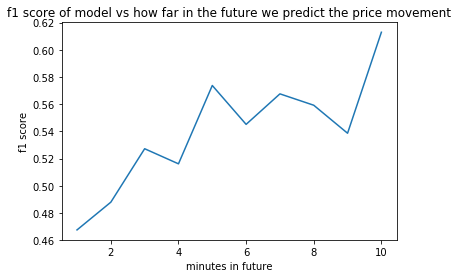

In [86]:
plt.plot([x for x in range(1,11)],plot_values)
plt.xlabel('minutes in future')
plt.ylabel('f1 score')
plt.title('f1 score of model vs how far in the future we predict the price movement')

In [87]:
accuracy_values = list()
for key in sorted(y_future.keys()):
    xTrain, xTest, yTrain, yTest = train_test_split(x.drop(y_future[key].index[y_future[key]['target'] == 0]), y_future[key].drop(y_future[key].index[y_future[key]['target'] == 0]), test_size=0.2)
    xTrain = scaler.fit_transform(xTrain)
    xTest = scaler.fit_transform(xTest)
    new_model = xgb.XGBClassifier(max_depth=2)
    new_model.fit(xTrain, yTrain)
    y_pred = new_model.predict(xTest)
    accuracy_values.append(balanced_accuracy_score(yTest, y_pred))

/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sk

/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sk

Text(0.5, 1.0, 'accuracy score of model vs how far in the future we predict the price movement')

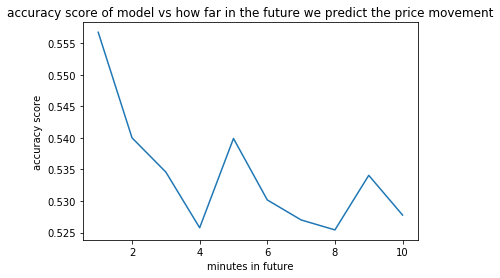

In [88]:
plt.plot([x for x in range(1,11)],accuracy_values)
plt.xlabel('minutes in future')
plt.ylabel('accuracy score')
plt.title('accuracy score of model vs how far in the future we predict the price movement')

This makes more sense. The farther we look ahead in the future, the lower our accuracy goes. For some reason the f1 score goes up (need to look up the difference between f1 and accuracy because I thought f1 just made sure to remove class imbalance when looking at a model's performance)

# Add Technical Indicators as Features

In [84]:
import talib

In [85]:
talib.EMA(np.array(x.close), timeperiod=3)

array([           nan,            nan,  8555.5       , ...,
       10686.45766703, 10700.22883351, 10703.36441676])

In [86]:
talib.TEMA(np.array(x.close), timeperiod=3)

array([           nan,            nan,            nan, ...,
       10673.95546313, 10707.7807918 , 10709.5080302 ])

In [87]:
talib.RSI(np.array(x.close), timeperiod=3)

array([        nan,         nan,         nan, ..., 25.05845775,
       56.78020475, 50.73967928])

In [88]:
talib.STOCHRSI(np.array(x.close), timeperiod=3)

(array([         nan,          nan,          nan, ...,  70.48387206,
        100.        ,  87.88039349]),
 array([        nan,         nan,         nan, ..., 46.7311697 ,
        80.06450304, 86.12142185]))

In [89]:
macd, two, three = talib.MACD(np.array(x.close), fastperiod=12, slowperiod=26)

In [90]:
macd[33]

-4.87942574308363

In [91]:
talib.ROC(talib.RSI(np.array(x.close), timeperiod=3), timeperiod=3)

array([         nan,          nan,          nan, ...,  38.47103421,
       718.24492502,  55.42327177])

In [92]:
talib.ROC(talib.EMA(np.array(x.close), timeperiod=3), timeperiod=3)

array([        nan,         nan,         nan, ..., -0.52318199,
       -0.04298839,  0.04158443])

In [93]:
talib.ROC(talib.TEMA(np.array(x.close), timeperiod=3), timeperiod=3)

array([        nan,         nan,         nan, ..., -0.52777491,
        0.32262518,  0.23004846])

In [94]:
tryx = x.copy()

In [95]:
tryx.head()

,open,close,high,low,volume,buy_volume,sell_volume,max_buy,max_sell,sell_50,...,buy_50,buy_100,buy_500,buy_1000,buy_10000,buy_100000,buy_200000,buy_count,sell_count,avg_volume
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-06-01 00:00:00,8546.0,8544.0,8546.5,8543.5,2863215,1490030,1373185,200000.0,100400.0,398,...,160,142,113,95,19,4.0,0.0,201,504,4061.297872
2019-06-01 00:01:00,8544.5,8557.0,8563.0,8544.0,2058785,1479285,579500,189127.0,90000.0,198,...,464,388,252,181,33,1.0,0.0,712,263,2111.574359
2019-06-01 00:02:00,8556.5,8565.5,8567.5,8556.5,2468185,1224395,1243790,74000.0,214169.0,91,...,382,347,232,186,22,0.0,0.0,571,120,3571.903039
2019-06-01 00:03:00,8566.0,8562.5,8566.0,8557.5,931585,263639,667946,18521.0,111334.0,186,...,108,87,65,49,3,0.0,0.0,172,259,2161.450116
2019-06-01 00:04:00,8563.0,8556.5,8563.0,8556.5,797504,170871,626633,65835.0,121070.0,157,...,32,28,23,15,3,0.0,0.0,48,237,2798.259649


In [96]:
ema = pd.DataFrame(talib.EMA(np.array(x.close), timeperiod=3))
tema = pd.DataFrame(talib.TEMA(np.array(x.close), timeperiod=3))
rsi = pd.DataFrame(talib.RSI(np.array(x.close), timeperiod=3))
rocrsi = pd.DataFrame(talib.ROC(talib.RSI(np.array(x.close), timeperiod=3), timeperiod=3))
rocema = pd.DataFrame(talib.ROC(talib.EMA(np.array(x.close), timeperiod=3), timeperiod=3))
roctema = pd.DataFrame(talib.ROC(talib.TEMA(np.array(x.close), timeperiod=3), timeperiod=3))

In [97]:
tryx['ema'] = ema.shift(periods=1).values
tryx['tema'] = tema.shift(periods=1).values
tryx['rsi'] = rsi.shift(periods=1).values
tryx['rocrsi'] = rocrsi.shift(periods=1).values
tryx['rocema'] = rocema.shift(periods=1).values
tryx['roctema'] = roctema.shift(periods=1).values
tryx['macd'] = pd.DataFrame(macd).shift(periods=1).values

In [98]:
tryx.tail()

,open,close,high,low,volume,buy_volume,sell_volume,max_buy,max_sell,sell_50,...,buy_count,sell_count,avg_volume,ema,tema,rsi,rocrsi,rocema,roctema,macd
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-06-30 23:54:00,10729.5,10667.0,10729.5,10667.0,9317281,2407456,6909825,108699.0,138827.0,1692,...,477,2031,3715.024322,10742.661336,10730.588818,18.096534,-55.992266,-0.251902,-0.367558,-49.819318
2019-06-30 23:55:00,10667.0,10693.0,10725.0,10667.0,9902813,6492284,3410529,276712.0,200000.0,414,...,1066,535,6185.392255,10704.830668,10673.345890,6.939268,-84.162825,-0.643343,-0.989513,-56.845913
2019-06-30 23:56:00,10696.0,10674.0,10708.0,10659.0,10456969,3411784,7045185,200000.0,500000.0,833,...,475,1080,6724.738907,10698.915334,10684.927519,32.646127,60.449013,-0.524460,-0.557245,-59.629190
2019-06-30 23:57:00,10674.5,10714.0,10720.5,10674.5,16379460,8817067,7562393,500000.0,970495.0,626,...,1367,743,7762.777251,10686.457667,10673.955463,25.058458,38.471034,-0.523182,-0.527775,-62.645955
2019-06-30 23:58:00,10714.0,10706.5,10720.0,10704.0,4843029,2762443,2080586,700000.0,400000.0,294,...,438,365,6031.169365,10700.228834,10707.780792,56.780205,718.244925,-0.042988,0.322625,-61.104720


In [99]:
tryx.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43198 entries, 2019-06-01 00:00:00 to 2019-06-30 23:58:00
Data columns (total 33 columns):
open           43198 non-null float64
close          43198 non-null float64
high           43198 non-null float64
low            43198 non-null float64
volume         43198 non-null int64
buy_volume     43198 non-null int64
sell_volume    43198 non-null int64
max_buy        43198 non-null float64
max_sell       43198 non-null float64
sell_50        43198 non-null int64
sell_100       43198 non-null int64
sell_500       43198 non-null int64
sell_1000      43198 non-null int64
sell_10000     43198 non-null float64
sell_100000    43198 non-null float64
sell_200000    43198 non-null float64
buy_50         43198 non-null int64
buy_100        43198 non-null int64
buy_500        43198 non-null int64
buy_1000       43198 non-null int64
buy_10000      43198 non-null int64
buy_100000     43198 non-null float64
buy_200000     43198 non-null float64
buy_co

In [100]:
tryx.dropna(axis='rows',inplace=True)

In [101]:
y = y.loc[tryx.index]

In [102]:
tryx.sort_index(inplace=True)
y.sort_index(inplace=True)

In [103]:
xTrain, xTest, yTrain, yTest = train_test_split(tryx, y, test_size=0.2)

In [104]:
scaler = StandardScaler()

xTrain = scaler.fit_transform(xTrain)
xTest = scaler.fit_transform(xTest)

/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [118]:
clf = RandomForestClassifier()

test_params = {
 'max_depth':[2,4,6],
 'n_estimators':[10,20,30,40,50]
}

clf = GridSearchCV(estimator = clf,param_grid = test_params, cv=5)
clf.fit(xTrain, yTrain)
print(clf.best_params_)

/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/model_selection/_va

/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/model_selection/_va

/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/model_selection/_va

{'n_estimators': 20, 'max_depth': 6}


In [105]:
clf = RandomForestClassifier(max_depth=6, n_estimators=20)
clf.fit(xTrain, yTrain)

/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [106]:
y_pred = clf.predict(xTest)
print(balanced_accuracy_score(yTest, y_pred))

0.5620624974034053


In [121]:
new_model = xgb.XGBClassifier()

test_params = {
 'max_depth':[2,4,6]
}

new_model = GridSearchCV(estimator = new_model,param_grid = test_params, cv=5)
new_model.fit(xTrain, yTrain)
print(new_model.best_params_)

/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when 

/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'max_depth': 2}


In [107]:
new_model = xgb.XGBClassifier(max_depth=2)
new_model.fit(xTrain, yTrain)

/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [108]:
y_pred = new_model.predict(xTest)
print(balanced_accuracy_score(yTest, y_pred))

0.5591386913378681


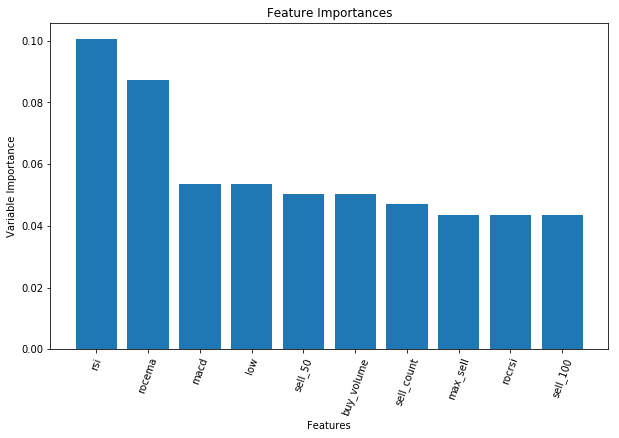

In [109]:
features = tryx.columns
importances = new_model.feature_importances_
indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(range(xTrain.shape[1])[:10], importances[indices[:10]])
plt.title('Feature Importances')
plt.xticks(range(xTrain.shape[1])[:10], [features[i] for i in indices], rotation=70)
ax.set_xlabel('Features')
ax.set_ylabel('Variable Importance')
plt.show()

In [119]:
accuracy_values = list()
for key in sorted(y_future.keys()):
    cur_y = y_future[key].loc[tryx.index]
    cur_y.sort_index(inplace=True)
    temp = np.empty(shape=10)
    for i in range(10):
        xTrain, xTest, yTrain, yTest = train_test_split(tryx, cur_y, test_size=0.2)
        scaler = StandardScaler()
        xTrain = scaler.fit_transform(xTrain)
        xTest = scaler.fit_transform(xTest)
        new_model = xgb.XGBClassifier(max_depth=2)
        new_model.fit(xTrain, yTrain)
        y_pred = new_model.predict(xTest)
        temp[i] = balanced_accuracy_score(yTest, y_pred)
        
    accuracy_values.append(temp.mean())

/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sk

/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sk

/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sk

/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sk

/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sk

/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sk

/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sk

/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sk

/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sk

/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sk

/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sk

/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sk

/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sk

/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sk

/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sk

/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sk

/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/sk

Text(0.5, 1.0, 'accuracy score of model vs how far in the future we predict the price movement')

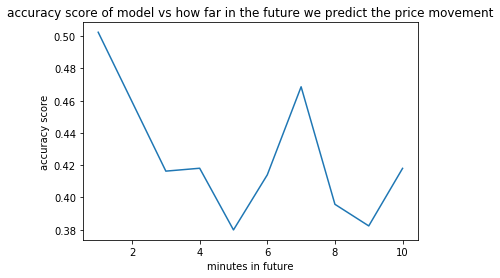

In [120]:
plt.plot([x for x in range(1,11)],accuracy_values)
plt.xlabel('minutes in future')
plt.ylabel('accuracy score')
plt.title('accuracy score of model vs how far in the future we predict the price movement')

Now let's try an ARIMA (Auto Regressive Integrated Moving Average) model giving it features 10 minutes behind us. First without technical indicators. We should come back and test the hypothesis of a property that lets us predict x minutes in the future with similar accuracy to when we predict the next minute.

# ARIMA Model Without Technical Indicators

In [110]:
x.head()

,open,close,high,low,volume,buy_volume,sell_volume,max_buy,max_sell,sell_50,...,buy_50,buy_100,buy_500,buy_1000,buy_10000,buy_100000,buy_200000,buy_count,sell_count,avg_volume
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-06-01 00:00:00,8546.0,8544.0,8546.5,8543.5,2863215,1490030,1373185,200000.0,100400.0,398,...,160,142,113,95,19,4.0,0.0,201,504,4061.297872
2019-06-01 00:01:00,8544.5,8557.0,8563.0,8544.0,2058785,1479285,579500,189127.0,90000.0,198,...,464,388,252,181,33,1.0,0.0,712,263,2111.574359
2019-06-01 00:02:00,8556.5,8565.5,8567.5,8556.5,2468185,1224395,1243790,74000.0,214169.0,91,...,382,347,232,186,22,0.0,0.0,571,120,3571.903039
2019-06-01 00:03:00,8566.0,8562.5,8566.0,8557.5,931585,263639,667946,18521.0,111334.0,186,...,108,87,65,49,3,0.0,0.0,172,259,2161.450116
2019-06-01 00:04:00,8563.0,8556.5,8563.0,8556.5,797504,170871,626633,65835.0,121070.0,157,...,32,28,23,15,3,0.0,0.0,48,237,2798.259649


In [111]:
x.index[0]

Timestamp('2019-06-01 00:00:00')

In [112]:
base_columns = x.columns
x.columns = [column + '_1' for column in x.columns]

In [113]:
x.columns

Index(['open_1', 'close_1', 'high_1', 'low_1', 'volume_1', 'buy_volume_1',
       'sell_volume_1', 'max_buy_1', 'max_sell_1', 'sell_50_1', 'sell_100_1',
       'sell_500_1', 'sell_1000_1', 'sell_10000_1', 'sell_100000_1',
       'sell_200000_1', 'buy_50_1', 'buy_100_1', 'buy_500_1', 'buy_1000_1',
       'buy_10000_1', 'buy_100000_1', 'buy_200000_1', 'buy_count_1',
       'sell_count_1', 'avg_volume_1'],
      dtype='object')

In [116]:
for i in range(2,11):
    for column in base_columns:
        x[column + '_' + str(i)] = np.nan

In [118]:
len(x.columns)

260

In [122]:
idx_ref = pd.DatetimeIndex(start=tryx.index[0], end=tryx.index[-1], freq='min')
idx_ref[~idx_ref.isin(tryx.index)]


DatetimeIndex(['2019-06-28 12:00:00'], dtype='datetime64[ns]', freq='T')

In [144]:
s = pd.Series([np.nan for x in range(len(x.columns))])
s.name = np.datetime64(datetime.datetime.strptime('2019-06-28 12:00:00', '%Y-%m-%d %H:%M:%S'))

In [145]:
x = x.append(s)

/opt/anaconda3/envs/ikigai-ml/lib/python3.5/site-packages/pandas/core/frame.py:5175: RuntimeWarning: unorderable types: str() < int(), sort order is undefined for incomparable objects
  other.index).difference(self.columns).tolist()


In [146]:
x.loc[np.datetime64(datetime.datetime.strptime('2019-06-28 12:00:00', '%Y-%m-%d %H:%M:%S'))]

open_1          NaN
close_1         NaN
high_1          NaN
low_1           NaN
volume_1        NaN
buy_volume_1    NaN
sell_volume_1   NaN
max_buy_1       NaN
max_sell_1      NaN
sell_50_1       NaN
sell_100_1      NaN
sell_500_1      NaN
sell_1000_1     NaN
sell_10000_1    NaN
sell_100000_1   NaN
sell_200000_1   NaN
buy_50_1        NaN
buy_100_1       NaN
buy_500_1       NaN
buy_1000_1      NaN
buy_10000_1     NaN
buy_100000_1    NaN
buy_200000_1    NaN
buy_count_1     NaN
sell_count_1    NaN
avg_volume_1    NaN
open_2          NaN
close_2         NaN
high_2          NaN
low_2           NaN
                 ..
230             NaN
231             NaN
232             NaN
233             NaN
234             NaN
235             NaN
236             NaN
237             NaN
238             NaN
239             NaN
240             NaN
241             NaN
242             NaN
243             NaN
244             NaN
245             NaN
246             NaN
247             NaN
248             NaN


In [ ]:
count = 0
for i, row in x.iterrows():
    if count > 9:
        for j in range(count-10, count):
            